<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Multiple_Time_Series_Forecasting_using_DeepAR_Gluon_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# #!pip install --upgrade mxnet-cu101==1.6.0.post0
# !pip install --upgrade mxnet==1.6.0
# !pip install gluonts

In [3]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip
# !unzip LD2011_2014.txt.zip

import wget
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip'
filename = wget.download(url)

100% [......................................................................] 261335609 / 261335609

In [23]:
# import os
# os.getcwd()

file_dir = "LD2011_2014.txt"

In [24]:

# !head LD2011_2014.txt

In [25]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer
import numpy as np

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [26]:
df=pd.read_csv(file_dir, sep=';', index_col=0, parse_dates=True, decimal=',')

In [32]:
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:45:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393,7621.621622
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,...,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839,6702.702703
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977,6864.864865
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541


In [29]:
df.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


In [30]:
df.columns

Index(['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005', 'MT_006', 'MT_007',
       'MT_008', 'MT_009', 'MT_010',
       ...
       'MT_361', 'MT_362', 'MT_363', 'MT_364', 'MT_365', 'MT_366', 'MT_367',
       'MT_368', 'MT_369', 'MT_370'],
      dtype='object', length=370)

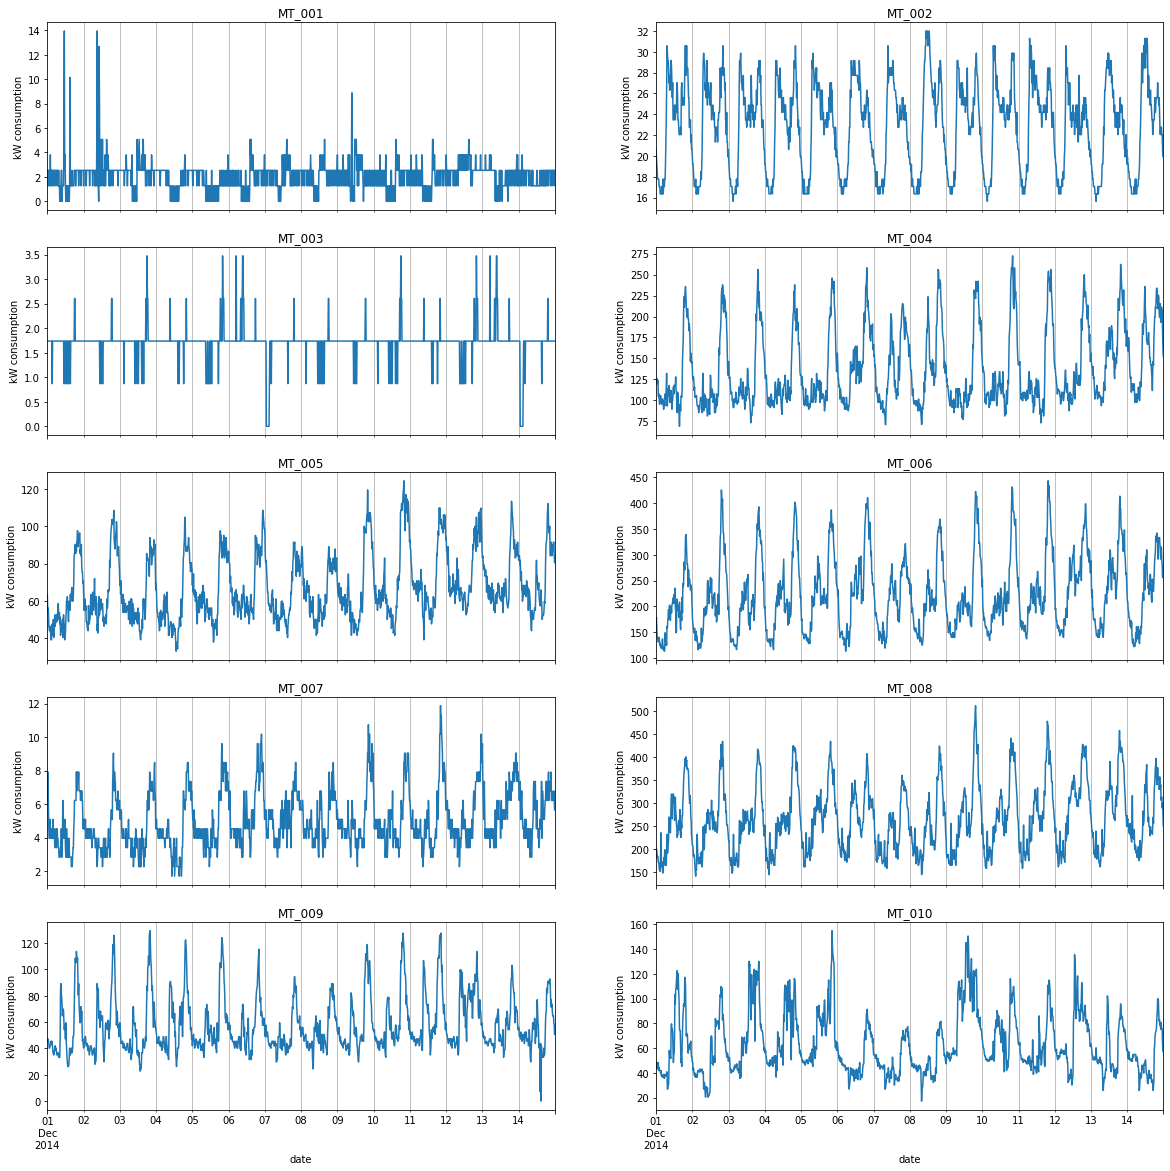

In [31]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), sharex=True)
axx = axs.ravel()
for i in range(0, 10):
    df[df.columns[i]].loc["2014-12-01":"2014-12-14"].plot(ax=axx[i])
    axx[i].set_xlabel("date")    
    axx[i].set_ylabel("kW consumption")   
    axx[i].set_title(df.columns[i])
    axx[i].grid(which='minor', axis='x')

In [33]:
df_input=df.reset_index(drop=True).T.reset_index()

In [34]:
df_input

,index,0,1,2,3,4,5,6,7,8,...,140246,140247,140248,140249,140250,140251,140252,140253,140254,140255
0,MT_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,2.538071,1.269036,2.538071
1,MT_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.048364,22.048364,22.048364,22.048364,22.048364,22.048364,21.337127,20.625889,21.337127,19.914651
2,MT_003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619
3,MT_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156.504065,164.634146,160.569106,162.601626,156.504065,150.406504,166.666667,162.601626,166.666667,178.861789
4,MT_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.585366,93.902439,87.804878,80.487805,85.365854,85.365854,81.707317,82.926829,85.365854,84.146341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,MT_366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.510825,6.436513,11.702750,8.191925,4.681100,5.851375,9.947338,9.362200,4.095963,4.095963
366,MT_367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,546.971027,521.510097,672.519754,719.051800,707.638279,697.102722,671.641791,670.763828,664.618086,628.621598
367,MT_368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,185.308848,173.622705,213.689482,205.342237,188.647746,176.961603,168.614357,153.589316,146.911519,131.886477
368,MT_369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,653.958944,658.357771,711.876833,694.281525,652.492669,651.026393,669.354839,670.087977,646.627566,673.020528


### get code for each household

In [42]:
df_input['index'].astype('category').cat.codes.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [43]:
ts_code=df_input["index"].astype('category').cat.codes.values

In [44]:
ts_code

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [45]:
df_input

,index,0,1,2,3,4,5,6,7,8,...,140246,140247,140248,140249,140250,140251,140252,140253,140254,140255
0,MT_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,2.538071,1.269036,2.538071
1,MT_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.048364,22.048364,22.048364,22.048364,22.048364,22.048364,21.337127,20.625889,21.337127,19.914651
2,MT_003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619
3,MT_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156.504065,164.634146,160.569106,162.601626,156.504065,150.406504,166.666667,162.601626,166.666667,178.861789
4,MT_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.585366,93.902439,87.804878,80.487805,85.365854,85.365854,81.707317,82.926829,85.365854,84.146341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,MT_366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.510825,6.436513,11.702750,8.191925,4.681100,5.851375,9.947338,9.362200,4.095963,4.095963
366,MT_367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,546.971027,521.510097,672.519754,719.051800,707.638279,697.102722,671.641791,670.763828,664.618086,628.621598
367,MT_368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,185.308848,173.622705,213.689482,205.342237,188.647746,176.961603,168.614357,153.589316,146.911519,131.886477
368,MT_369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,653.958944,658.357771,711.876833,694.281525,652.492669,651.026393,669.354839,670.087977,646.627566,673.020528


In [46]:
df_train=df_input.iloc[:,1:134999].values
df_test=df_input.iloc[:,134999:].values

In [47]:
df_train.shape

(370, 134998)

In [48]:
df_test.shape

(370, 5258)

In [49]:
freq="15min"
start_train = pd.Timestamp("2011-01-01 00:15:00", freq=freq)
start_test = pd.Timestamp("2014-11-07 05:30:00", freq=freq)
prediction_lentgh=672

In [50]:
start_train

Timestamp('2011-01-01 00:15:00', freq='15T')

## We build only one model but DeepAR uses the use_feat_static (which shows every house) to build separate models

## Cardinality is for number of categorical varialbles that we have

## context lenght is for using the lenght of data for modeling, 672 *15min==7 days


In [52]:
estimator = DeepAREstimator(freq=freq, 
                            context_length=672,
                            prediction_length=prediction_lentgh,
                            use_feat_static_cat=True,
                            cardinality=[1],
                            num_layers=2,
                            num_cells=32,
                            cell_type='lstm',
                            trainer=Trainer(epochs=5))

In [53]:
df_train[0:7]

array([[  0.        ,   0.        ,   0.        , ...,   2.53807107,
          2.53807107,   1.26903553],
       [  0.        ,   0.        ,   0.        , ...,  17.06970128,
         17.78093883,  17.78093883],
       [  0.        ,   0.        ,   0.        , ...,   1.73761946,
          1.73761946,   1.73761946],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  47.56097561,
         43.90243902,  43.90243902],
       [  0.        ,   0.        ,   0.        , ..., 107.14285714,
        116.07142857,  98.21428571],
       [  0.        ,   0.        ,   0.        , ...,   4.522329  ,
          4.522329  ,   3.95703787]])

In [54]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName

train_ds = ListDataset([
    {
        FieldName.TARGET: target,
        FieldName.START: start_train,
        FieldName.FEAT_STATIC_CAT: fsc
    }
    for (target, fsc) in zip(df_train[0:7],
                             ts_code[0:7].reshape(-1,1))
], freq=freq)

test_ds = ListDataset([
    {
        FieldName.TARGET: target,
        FieldName.START: start_test,
        FieldName.FEAT_STATIC_CAT: fsc
    }
    for (target, fsc) in zip(df_test[0:7],
                            ts_code[0:7].reshape(-1,1))
], freq=freq)

In [55]:
next(iter(train_ds))

{'target': array([0.       , 0.       , 0.       , ..., 2.5380712, 2.5380712,
        1.2690356], dtype=float32),
 'start': Timestamp('2011-01-01 00:15:00', freq='15T'),
 'feat_static_cat': array([0]),
 'source': SourceContext(source='list_data', row=0)}

In [56]:
predictor = estimator.train(training_data=train_ds)

Multiprocessing is not supported on Windows, num_workers will be set to None.
  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████████████████████████████████████████████| 50/50 [01:07<00:00,  1.35s/it, epoch=5/5, avg_epoch_loss=2.21]


In [57]:
from gluonts.evaluation.backtest import make_evaluation_predictions

In [58]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,  
    predictor=predictor,  
    num_samples=100, 
)

<generator object make_evaluation_predictions.<locals>.ts_iter at 0x000001C4769EB930>

In [61]:
from tqdm.autonotebook import tqdm

print("Obtaining time series conditioning values ...")
tss = list(tqdm(ts_it, total=len(df_test)))
print("Obtaining time series predictions ...")
forecasts = list(tqdm(forecast_it, total=len(df_test)))

Obtaining time series conditioning values ...


C:\Users\mmm559\Anaconda3\envs\ftrml_milad\lib\site-packages\ipykernel_launcher.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  """Entry point for launching an IPython kernel.


  0%|          | 0/370 [00:00<?, ?it/s]

Obtaining time series predictions ...


  0%|          | 0/370 [00:00<?, ?it/s]

In [62]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = prediction_lentgh
    prediction_intervals = (80.0, 95.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

  0%|          | 0/6 [00:00<?, ?it/s]

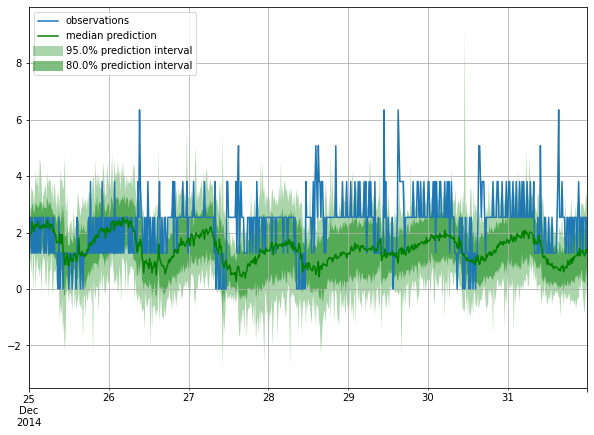

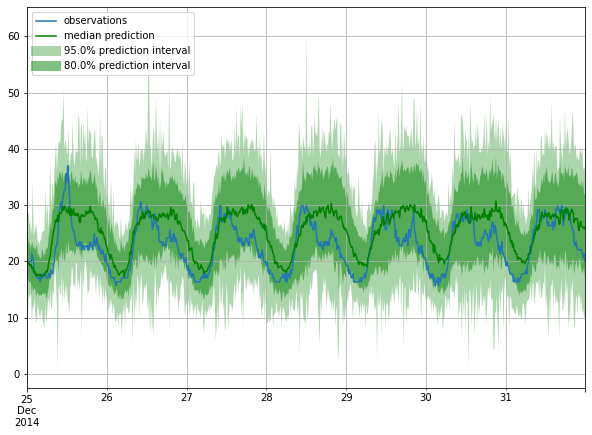

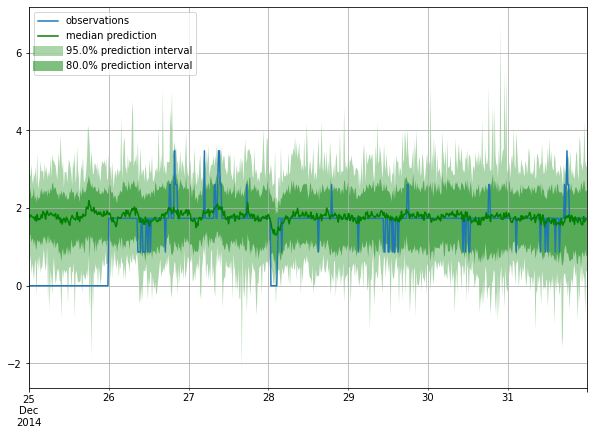

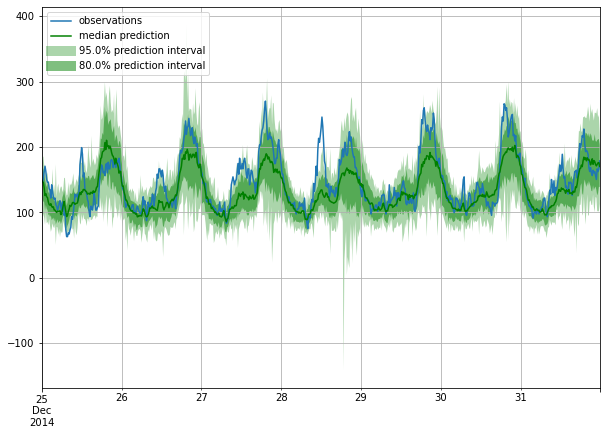

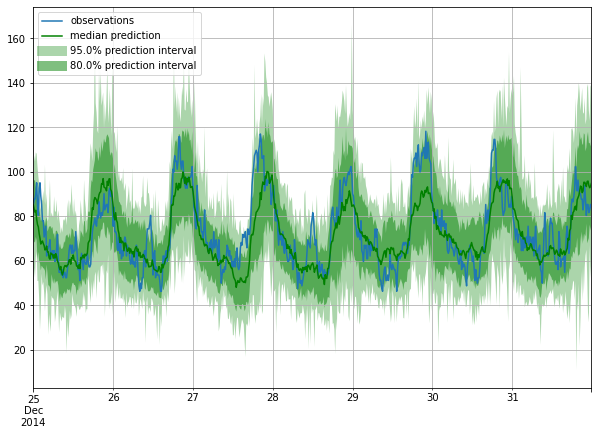

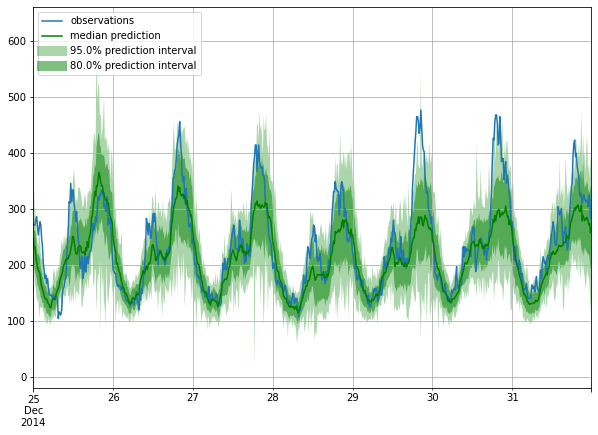

In [63]:
for i in tqdm(range(6)):
    ts_entry = tss[i]
    forecast_entry = forecasts[i]
    plot_prob_forecasts(ts_entry, forecast_entry)

In [64]:
from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(df_test[0:7]))

Running evaluation: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 157.53it/s]


In [65]:
item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,1.946071,744.720825,1513.959351,2.252916,0.839750,1.319697,0.406066,0.621857,NaN,12.539744,257.999007,0.072917,744.720818,0.200893,554.759820,0.522321
1,NaN,13.783369,2138.604980,15320.056641,22.797703,0.811912,3.919694,0.148034,0.134777,NaN,29.573605,592.967288,0.044643,2138.605120,0.799107,1175.996854,0.997024
2,NaN,0.551168,278.373566,984.361450,1.464824,0.114831,3.607453,0.096933,0.392073,NaN,45.436752,289.122244,0.181548,278.373568,0.690476,147.898592,0.979167
3,NaN,731.004836,13179.165039,98455.281250,146.510835,8.946636,2.192092,0.123758,0.131341,NaN,16.213704,5762.610243,0.037202,13179.165176,0.276786,7447.583728,0.754464
4,NaN,90.609741,4854.067383,49303.656250,73.368536,4.198207,1.720571,0.096073,0.098092,NaN,13.990692,2400.084951,0.020833,4854.067368,0.479167,2518.157657,0.907738
5,NaN,2355.759673,22249.843750,157196.437500,233.923270,13.675547,2.421101,0.125079,0.132964,NaN,18.748439,8780.844859,0.034226,22249.842575,0.352679,14011.914761,0.736607
6,NaN,3.460320,876.615112,3665.913086,5.455228,0.594141,2.195584,0.240709,0.230731,NaN,19.152292,317.591605,0.059524,876.615089,0.568452,583.683006,0.858631


In [ ]:
feat_add=pd.DataFrame(df_input[['T_out']][:train_time].values).apply(lambda x: np.asarray(x), axis=1).tolist()

In [ ]:
feat_add